# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [4]:
df['Dia da semana'] = df['Data Emissão'].dt.dayofweek

In [5]:
df['Fim de semana'] = df['Dia da semana'].isin([5, 6]).astype(int)

In [6]:
df['Dia do mês'] = df['Data Emissão'].dt.day

In [7]:
df['Trimestre'] = df['Data Emissão'].dt.quarter

In [9]:
df['Valor NF_5_q'] = pd.qcut(df['Valor NF'], 5, labels=False)

In [10]:
df['Valor NF_10_q'] = pd.qcut(df['Valor NF'], 10, labels=False)

In [11]:
df['Valor NF_20_q'] = pd.qcut(df['Valor NF'], 20, labels=False)

In [12]:
df['Valor NF_50_q'] = pd.qcut(df['Valor NF'], 50, labels=False)

In [13]:
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,flag_credito,categoria,Dia da semana,Fim de semana,Dia do mês,Trimestre,Valor NF_5_q,Valor NF_10_q,Valor NF_20_q,Valor NF_50_q
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,0,Mercado,4,0,30,2,1,3,7,17
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,0,Auto posto,4,0,30,2,2,5,11,28
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,1,Restaurantes,4,0,30,2,1,3,7,19
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,1,Restaurantes,4,0,30,2,3,7,15,38
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,1,Restaurantes,4,0,30,2,3,7,15,39


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [15]:
def calc_iv(df, categoria, evento):
    df_iv = df.groupby(categoria).agg({evento: ['sum', 'count']})
    df_iv.columns = ['Eventos', 'Total']
    df_iv['Non-Eventos'] = df_iv['Total'] - df_iv['Eventos']

    df_iv = df_iv[(df_iv['Eventos'] > 0) & (df_iv['Non-Eventos'] > 0)]

    df_iv['Taxa Evento'] = df_iv['Eventos'] / df_iv['Eventos'].sum()
    df_iv['Taxa Non-Evento'] = df_iv['Non-Eventos'] / df_iv['Non-Eventos'].sum()

    df_iv['WOE'] = np.log(df_iv['Taxa Evento'] / df_iv['Taxa Non-Evento'])
    df_iv['IV'] = (df_iv['Taxa Evento'] - df_iv['Taxa Non-Evento']) * df_iv['WOE']

    iv_total = df_iv['IV'].sum()

    return iv_total

In [16]:
iv = {}
variables = [
    'Dia da semana', 'Fim de semana', 'Dia do mês', 'Trimestre',
    'Valor NF_5_q', 'Valor NF_10_q', 'Valor NF_20_q', 'Valor NF_50_q'
]
for var in variables:
    iv[var] = calc_iv(df, var, 'flag_credito')

In [18]:
iv

{'Dia da semana': 0.006883336112261752,
 'Fim de semana': 0.004346143885426167,
 'Dia do mês': 0.04371881239108832,
 'Trimestre': 0.011507201400315355,
 'Valor NF_5_q': 0.05669465698593576,
 'Valor NF_10_q': 0.10664979368195977,
 'Valor NF_20_q': 0.12452461379728179,
 'Valor NF_50_q': 0.1523145641483627}

## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

### Conclusão

Variáveis com maior poder de discriminação: As variáveis Valor NF_50_q, Valor NF_20_q, e Valor NF_10_q apresentam maior poder de discriminação, com IVs indicando um poder discriminatório médio.

Relação entre número de categorias e IV: Há uma relação positiva entre o número de categorias usadas para categorizar a variável contínua Valor NF e o IV. À medida que aumentamos o número de categorias (quantis), o IV aumenta, indicando uma maior capacidade discriminatória.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [22]:
df_trimestral = df.groupby(['Ano', 'Trimestre']).size().reset_index(name='Quantidade de Notas')
df_trimestral['Período'] = df_trimestral['Ano'].astype(str) + '-Q' + df_trimestral['Trimestre'].astype(str)

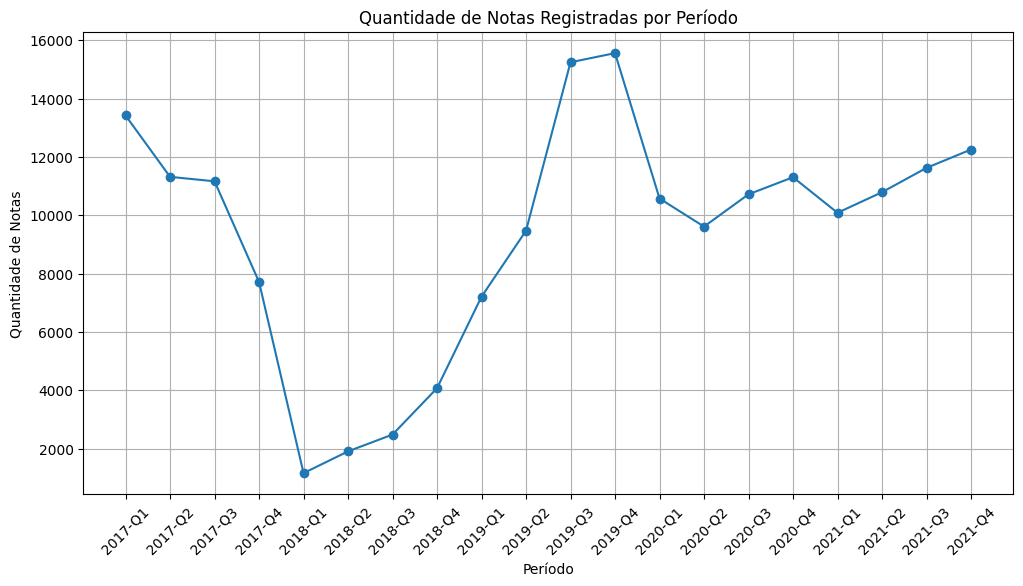

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df_trimestral['Período'], df_trimestral['Quantidade de Notas'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Período')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas Registradas por Período')
plt.grid(True)
plt.show()

In [25]:
df_categoria_trimestral = df.groupby(['Ano', 'Trimestre', 'categoria']).size().reset_index(name='Quantidade de Notas')
df_categoria_trimestral['Período'] = df_categoria_trimestral['Ano'].astype(str) + '-Q' + df_categoria_trimestral['Trimestre'].astype(str)

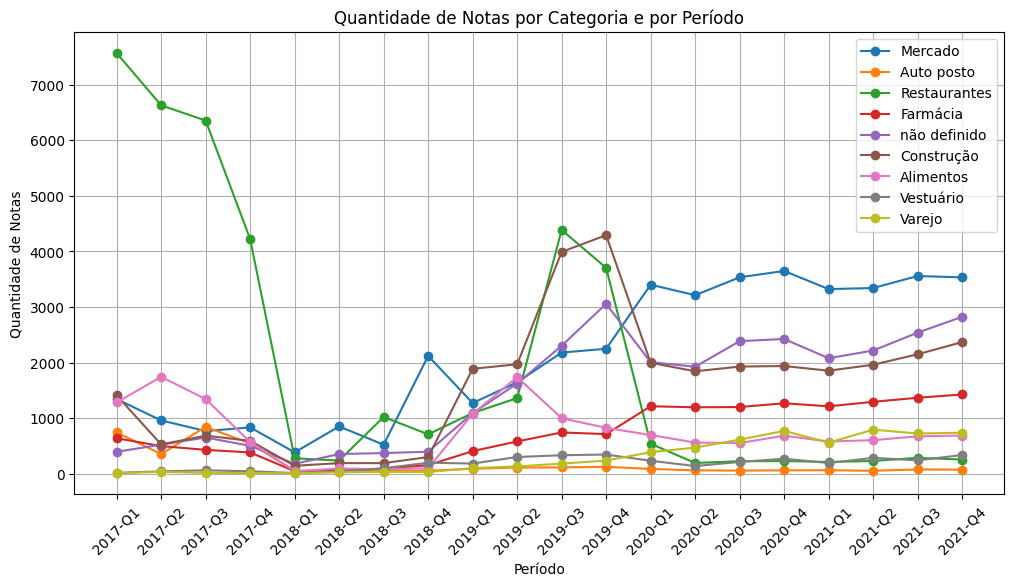

In [26]:
plt.figure(figsize=(12, 6))
for categoria in df['categoria'].unique():
    categoria_data = df_categoria_trimestral[df_categoria_trimestral['categoria'] == categoria]
    plt.plot(categoria_data['Período'], categoria_data['Quantidade de Notas'], marker='o', label=categoria)

plt.xticks(rotation=45)
plt.xlabel('Período')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas por Categoria e por Período')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
df_credito_trimestral = df.groupby(['Ano', 'Trimestre', 'categoria']).agg(
    Total_Notas=('flag_credito', 'size'),
    Notas_Com_Credito=('flag_credito', 'sum')
).reset_index()

df_credito_trimestral['Proporção Com Crédito'] = df_credito_trimestral['Notas_Com_Credito'] / df_credito_trimestral['Total_Notas']
df_credito_trimestral['Período'] = df_credito_trimestral['Ano'].astype(str) + '-Q' + df_credito_trimestral['Trimestre'].astype(str)

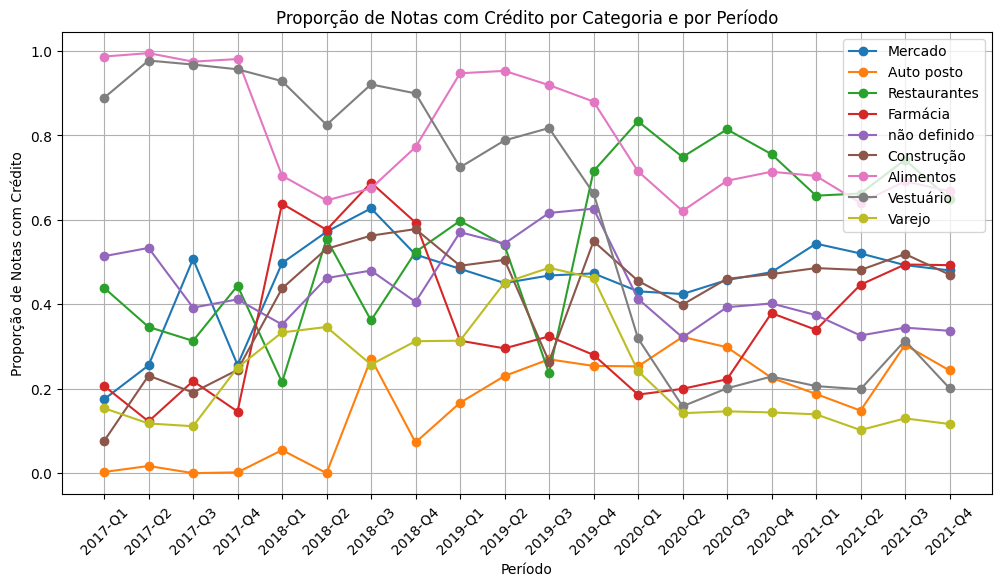

In [29]:
plt.figure(figsize=(12, 6))
for categoria in df['categoria'].unique():
    categoria_data = df_credito_trimestral[df_credito_trimestral['categoria'] == categoria]
    plt.plot(categoria_data['Período'], categoria_data['Proporção Com Crédito'], marker='o', label=categoria)

plt.xticks(rotation=45)
plt.xlabel('Período')
plt.ylabel('Proporção de Notas com Crédito')
plt.title('Proporção de Notas com Crédito por Categoria e por Período')
plt.legend()
plt.grid(True)
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [32]:
def calculate_woe_iv(df, feature, target):
    df_woe = pd.DataFrame()
    df_woe['count'] = df.groupby(feature)[target].count()
    df_woe['event'] = df.groupby(feature)[target].sum()
    df_woe['non_event'] = df_woe['count'] - df_woe['event']

    total_event = df[target].sum()
    total_non_event = len(df) - total_event

    df_woe['event_rate'] = df_woe['event'] / total_event
    df_woe['non_event_rate'] = df_woe['non_event'] / total_non_event

    df_woe['WOE'] = np.log(df_woe['event_rate'] / df_woe['non_event_rate'])
    df_woe['IV'] = (df_woe['event_rate'] - df_woe['non_event_rate']) * df_woe['WOE']

    return df_woe.reset_index()


def calculate_woe_iv_by_period(df, period_vars, feature, target):
    results = []
    periods = df.groupby(period_vars).size().reset_index().drop(0, axis=1)

    for index, period in periods.iterrows():
        period_df = df[(df[period_vars[0]] == period[period_vars[0]]) &
                       (df[period_vars[1]] == period[period_vars[1]])]
        woe_iv_df = calculate_woe_iv(period_df, feature, target)
        woe_iv_df[period_vars[0]] = period[period_vars[0]]
        woe_iv_df[period_vars[1]] = period[period_vars[1]]
        results.append(woe_iv_df)

    return pd.concat(results, ignore_index=True)

In [34]:
woe_iv_trimestral = calculate_woe_iv_by_period(df, ['Ano', 'Trimestre'], 'categoria', 'flag_credito')
woe_iv_trimestral['Período'] = woe_iv_trimestral['Ano'].astype(str) + '-Q' + woe_iv_trimestral['Trimestre'].astype(str)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


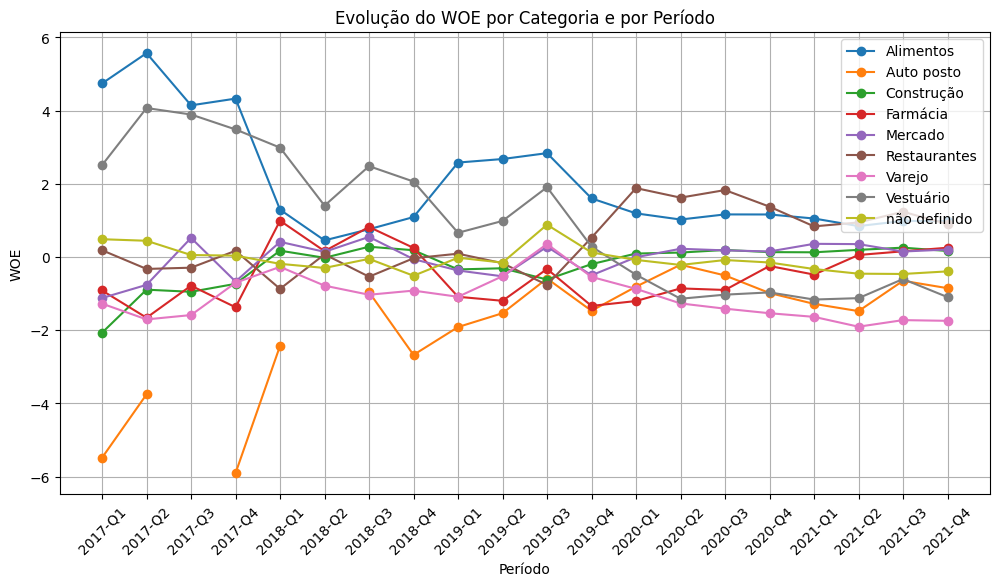

In [36]:
plt.figure(figsize=(12, 6))
for categoria in woe_iv_trimestral['categoria'].unique():
    categoria_data = woe_iv_trimestral[woe_iv_trimestral['categoria'] == categoria]
    plt.plot(categoria_data['Período'], categoria_data['WOE'], marker='o', label=categoria)

plt.xticks(rotation=45)
plt.xlabel('Período')
plt.ylabel('WOE')
plt.title('Evolução do WOE por Categoria e por Período')
plt.legend()
plt.grid(True)
plt.show()

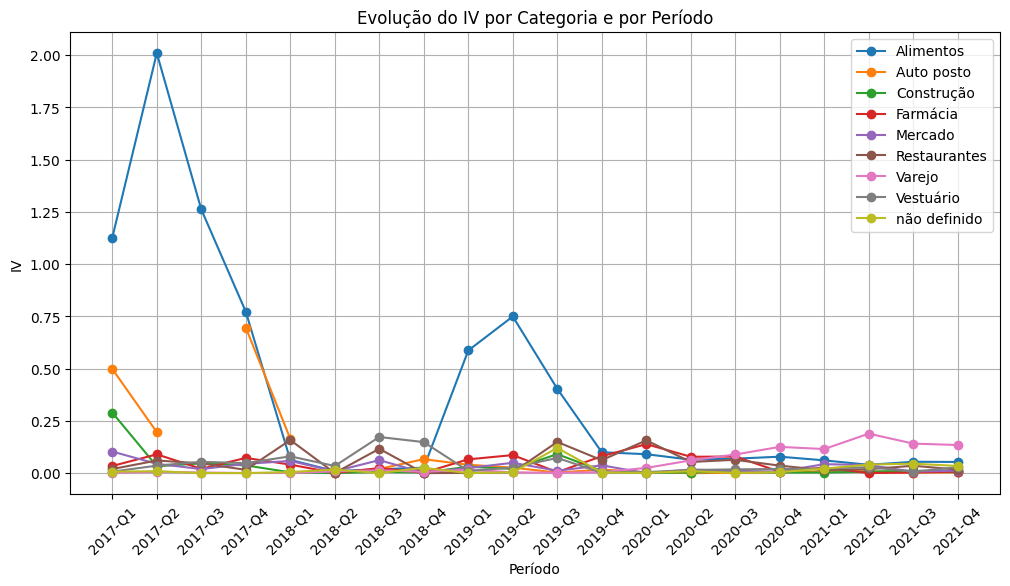

In [38]:
plt.figure(figsize=(12, 6))
for categoria in woe_iv_trimestral['categoria'].unique():
    categoria_data = woe_iv_trimestral[woe_iv_trimestral['categoria'] == categoria]
    plt.plot(categoria_data['Período'], categoria_data['IV'], marker='o', label=categoria)

plt.xticks(rotation=45)
plt.xlabel('Período')
plt.ylabel('IV')
plt.title('Evolução do IV por Categoria e por Período')
plt.legend()
plt.grid(True)
plt.show()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

In [39]:
df['Trimestre'] = df['Data Emissão'].dt.quarter
df_filtered = df[df['Data Emissão'] >= '2020-01-01']
df_filtered['Retorno Positivo'] = (df_filtered['Retorno'] > 0).astype(int)

proportion_by_period = df_filtered.groupby(['Ano', 'Trimestre', 'categoria']).agg(
    Total_Notas=('Retorno Positivo', 'size'),
    Notas_Com_Retorno=('Retorno Positivo', 'sum')
).reset_index()

<ipython-input-39-51f9140fee81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Retorno Positivo'] = (df_filtered['Retorno'] > 0).astype(int)


In [40]:
proportion_by_period['Proporção Com Retorno'] = proportion_by_period['Notas_Com_Retorno'] / proportion_by_period['Total_Notas']
proportion_by_period['Período'] = proportion_by_period['Ano'].astype(str) + '-Q' + proportion_by_period['Trimestre'].astype(str)

In [62]:
proportion_by_period.groupby('categoria', as_index=False).sum(numeric_only=True).sort_values(by='Notas_Com_Retorno', ascending=False)

,categoria,Ano,Trimestre,Total_Notas,Notas_Com_Retorno,Proporção Com Retorno
4,Mercado,18183,21,27558,13177,3.825007
2,Construção,18183,21,16047,7523,3.742473
8,não definido,18183,21,18407,6689,2.911185
3,Farmácia,18183,21,10189,3582,2.759527
0,Alimentos,18183,21,5050,3442,5.445008
5,Restaurantes,18183,21,2179,1626,5.863249
6,Varejo,16164,20,5066,701,1.161048
7,Vestuário,16164,20,1920,443,1.827164
1,Auto posto,18183,21,540,135,1.982195


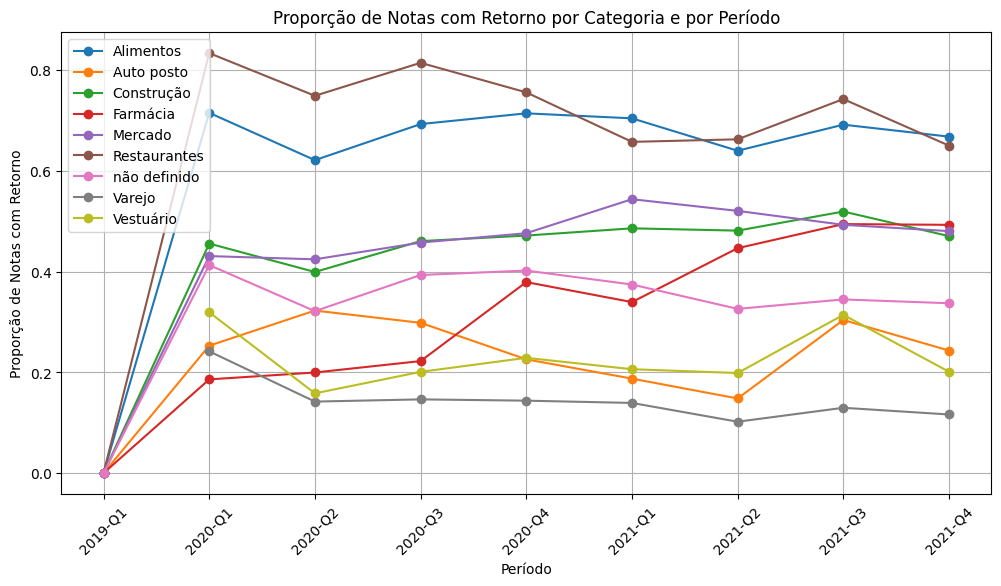

In [42]:
plt.figure(figsize=(12, 6))
for categoria in proportion_by_period['categoria'].unique():
    categoria_data = proportion_by_period[proportion_by_period['categoria'] == categoria]
    plt.plot(categoria_data['Período'], categoria_data['Proporção Com Retorno'], marker='o', label=categoria)

plt.xticks(rotation=45)
plt.xlabel('Período')
plt.ylabel('Proporção de Notas com Retorno')
plt.title('Proporção de Notas com Retorno por Categoria e por Período')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
before_2020 = df[df['Data Emissão'] < '2020-01-01']
after_2020 = df[df['Data Emissão'] >= '2020-01-01']

In [51]:
before_2020['Retorno Positivo'] = (before_2020['Retorno'] > 0).astype(int)
after_2020['Retorno Positivo'] = (after_2020['Retorno'] > 0).astype(int)

<ipython-input-51-a89a28a36c6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_2020['Retorno Positivo'] = (before_2020['Retorno'] > 0).astype(int)
<ipython-input-51-a89a28a36c6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_2020['Retorno Positivo'] = (after_2020['Retorno'] > 0).astype(int)


In [56]:
proporcao_after_2020 = before_2020.groupby('categoria')['Retorno Positivo'].mean().reset_index(name='Proporção Com Retorno Antes 2020')
proporcao_before_2020 = after_2020.groupby('categoria')['Retorno Positivo'].mean().reset_index(name='Proporção Com Retorno Depois 2020')

In [58]:
proporcao = pd.merge(proporcao_before_2020, proporcao_after_2020, on='categoria')

In [59]:
proporcao

,categoria,Proporção Com Retorno Depois 2020,Proporção Com Retorno Antes 2020
0,Alimentos,0.681584,0.951160
1,Auto posto,0.250000,0.043188
2,Construção,0.468810,0.388412
3,Farmácia,0.351556,0.274469
4,Mercado,0.478155,0.438066
5,Restaurantes,0.746214,0.412350
6,Varejo,0.138373,0.398568
7,Vestuário,0.230729,0.801418
8,não definido,0.363394,0.554653


### As categorias com maior taxa de retorno acima de 0 são: Alimentos e Restaurantes. Percebe-se também que a proporção não é estável no tempo, havendo uma diminuição e aumento dependendo da categoria